by Andreas Bauer and David Boehringer, 19.06.2020
This script contains two examples for 3D-PIV: The shift of a bar of binary pixels in one direction, the expansion
and a real data set where we recorded two stacks of collagen fibres at the same field of view with confocal microscopy
 in reflection mode.  One stack contains a NK cell that deforms the matrix and the other doe not.
Please download the data at https://github.com/fabrylab/3D_piv_example_data.git (180 MB, unpacked) and provide the
folder in the code below.
We tested this on ubuntu 16 and 18, with Anaconda Python installation. The whole script
takes about 5 minutes on my 4 core-intel i5 @2.5 GHz Laptop. You should have !!! 8 Gb ob Memory !!!! or take care not
to open  all matplotlib plots as interactive windows at once.
For questions contact andreas.b.bauer@fau.de


In [1]:
from openpiv.pyprocess3D import *
from openpiv.PIV_3D_plotting import *
from openpiv.validation import sig2noise_val
from openpiv.filters import replace_outliers
from openpiv.lib import replace_nans
import glob as glob
import os
from natsort import natsorted
import matplotlib.animation as animation

Make save_plots = True if you want to compare the 
visual results 

In [2]:
save_plots = False
out_put_folder = "output_3D_test"
if save_plots:
    if not os.path.exists(out_put_folder):
        try:
            os.mkdir(out_put_folder)
        except:
            print("could not generate output folder")
            save_plots = False

############ a group of bars shifted by 1 pixel to the each dimesion the second frame #############
takes ~4 seconds

In [3]:
# constructing frame 1 and frame 2
size = (32, 32, 32)
shape1 = np.zeros(size)
shape2 = np.zeros(size)

In [4]:
shape1[16, 16, 25:27] = 1
shape1[16, 16, 7:9] = 1
shape1[16, 25:27, 16] = 1
shape1[16, 7:9, 16] = 1
shape1[25:27, 16, 16] = 1
shape1[7:9, 16, 16] = 1

In [5]:
shape2[16, 16, 24:26] = 1
shape2[16, 16, 8:10] = 1
shape2[16, 24:26, 16] = 1
shape2[16, 8:10, 16] = 1
shape2[24:26, 16, 16] = 1
shape2[8:10, 16, 16] = 1

In [6]:
window_size = (4, 4, 4)
overlap = (3, 3, 3)
search_area = (5, 5, 5)

In [7]:
u, v, w, sig2noise = extended_search_area_piv3D(shape1, shape2, window_size=window_size, overlap=overlap,
                                                search_area_size=search_area, subpixel_method='gaussian',
                                                sig2noise_method='peak2peak',
                                                width=2)

100%|██████████| 14/14 [00:00<00:00, 126.60it/s]


/home/user/miniconda3/envs/openpiv/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:901: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/user/miniconda3/envs/openpiv/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:903: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/home/user/miniconda3/envs/openpiv/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
/home/user/Downloads/repos/openpiv-python/openpiv/PIV_3D_plotting.py:335: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function 

Automatic pdb calling has been turned ON


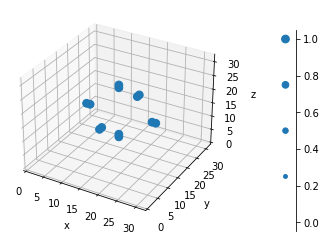

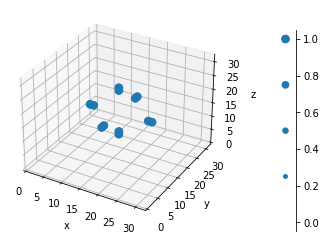

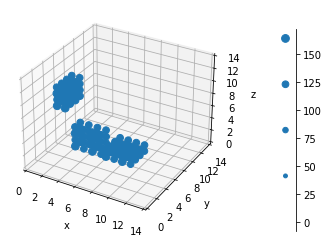

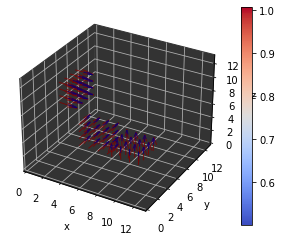

In [8]:
%pdb
# displaying the shapes with 3D scatter plot
fig1 = scatter_3D(shape1, control="size")
fig2 = scatter_3D(shape2, control="size")
# 3d plot of the signal-to-noise rations
fig3 = scatter_3D(sig2noise, control="size")
# 3d quiver plot of the displacement field
fig4 = quiver_3D(-u, v, w, cmap="coolwarm", quiv_args={"arrow_length_ratio":0.6})

In [9]:
# saving the plots
if save_plots:
    fig1.savefig(os.path.join(out_put_folder, "displaced_bar_frame1.png"))
    fig2.savefig(os.path.join(out_put_folder, "displaced_bar_frame2.png"))
    fig3.savefig(os.path.join(out_put_folder, "displaced_bar_sig2noise.png"))
    fig4.savefig(os.path.join(out_put_folder, "displaced_bar_deformation_field.png"))

################### test to check the replace_nans_function ######################
takes ~4 seconds

In [10]:
# ball shape with a gap of nans in the middle
center = (5, 5, 5)
size = (10, 10, 10)
distance = np.linalg.norm(np.subtract(np.indices(size).T, np.asarray(center)), axis=len(center))
arr = np.ones(size) * (distance <= 5)
hide = arr == 0
arr[5:7] = np.nan

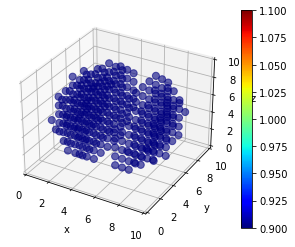

In [11]:
# displaying in 3d plots. Values outside of the original ball are hidden by setting to nan
arr_show = arr.copy()
arr_show[hide] = np.nan
fig9 = scatter_3D(arr_show, size=50, sca_args={"alpha": 0.6})
# replacing outliers
arr = replace_nans(arr, max_iter=2, tol=2, kernel_size=2, method='disk')

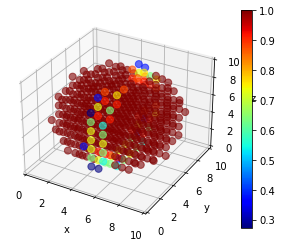

In [12]:
# displaying in 3d plots. Values outside of the original ball are hidden by setting to nan
arr_show = arr.copy()
arr_show[hide] = np.nan
fig10 = scatter_3D(arr_show, size=50, sca_args={"alpha": 0.6})

In [13]:
# saving the plots
if save_plots:
    fig9.savefig(os.path.join(out_put_folder, "replace_nan_gap.png"))
    fig10.savefig(os.path.join(out_put_folder, "replace_nan_filled.png"))

#################### real data example ############################

we recorded stacks of collagen fibres with confocal microscopy in reflection mode
"alive" stack contains a force generating NK-cell, marked by the red circle in the animation
"relaxed" stack is the same field of view with out the cell
download the data at https://github.com/fabrylab/3D_piv_example_data.git
this calculation takes ~ 3-4 minutes on my 4-core Intel i5@2.5 GHz Laptop

In [14]:
# please enter the path to the dataset provided at
folder = r"test_3d"

In [15]:
if not os.path.exists(folder): 
    import git 
    repo = git.Repo.clone_from("https://github.com/fabrylab/3D_piv_example_data.git", './test_3d', branch='master')

In [16]:
if not os.path.exists(folder):
    raise FileNotFoundError("path to 3d piv data '%s' does not exists\n"
                            ". Please download the data from https://github.com/fabrylab/3D_piv_example_data.git" % folder)
# stack properties
# factors for voxel size
du = 0.2407
dv = 0.2407
dw = 1.0071
# total image dimension for x y z
image_dim = (123.02, 123.02, 122.86)

In [17]:
# keep these values for our nk cells stacks
win_um = 12  # window size in µm
fac_overlap = 0.3  # overlap in percent of the window size
signoise_filter = 1.3

In [18]:
# window size for stacks in pixel
window_size = (int(win_um / du), int(win_um / dv), int(win_um / dw))
overlap = (int(fac_overlap * win_um / du), int(fac_overlap * win_um / dv), int(fac_overlap * win_um / dw))
search_area = (int(win_um / du), int(win_um / dv), int(win_um / dw))

In [19]:
# load tense stacks
images = natsorted(glob.glob(os.path.join(folder, "Series001_t22_z*_ch00.tif")))
im_shape = plt.imread(images[0]).shape
alive = np.zeros((im_shape[0], im_shape[1], len(images)))
for i, im in enumerate(images):
    alive[:, :, i] = plt.imread(im)

In [20]:
# load relaxed stack
images = natsorted(glob.glob(os.path.join(folder, "Series003_t05_z*_ch00.tif")))
im_shape = plt.imread(images[0]).shape
relax = np.zeros((im_shape[0], im_shape[1], len(images)))
for i, im in enumerate(images):
    relax[:, :, i] = plt.imread(im)

In [21]:
# 3D PIV
u, v, w, sig2noise = extended_search_area_piv3D(relax, alive, window_size=window_size, overlap=overlap,
                                                search_area_size=search_area, dt=(1 / du, 1 / dv, 1 / dw),
                                                subpixel_method='gaussian',
                                                sig2noise_method='peak2peak',
                                                width=2)

100%|██████████| 14/14 [01:31<00:00,  6.53s/it]


In [22]:
# correcting stage drift between the field of views
u -= np.nanmean(u)
v -= np.nanmean(v)
w -= np.nanmean(w)

In [23]:
# filtering
uf, vf, wf, mask = sig2noise_val(u, v, w=w, s2n=sig2noise, threshold=signoise_filter)
uf, vf, wf = replace_outliers(uf, vf, wf, max_iter=1, tol=100, kernel_size=2, method='disk')

In [24]:
# plotting
# representation of the image stacks by maximums projections. The red circle marks the position of the cell
def update_plot(i, ims, ax):
    a1 = ax.imshow(ims[i])
    a2 = ax.add_patch(plt.Circle((330, 140), 100, color="red", fill=False))
    return [a1, a2]

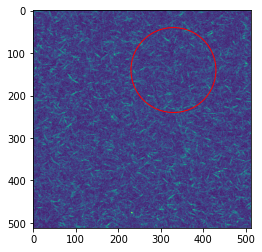

In [25]:
ims = [np.max(relax[:, :, 60:], axis=2), np.max(alive[:, :, 60:], axis=2)]
fig = plt.figure()
ax = plt.gca()
ani = animation.FuncAnimation(fig, update_plot, 2, interval=200, blit=True, repeat_delay=0, fargs=(ims, ax))

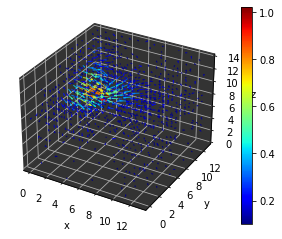

In [26]:
# unfiltered 3d deformation field
fig11 = quiver_3D(-u, v, w, quiv_args={"length": 2, "alpha": 0.8, "linewidth": 1}, filter_def=0.1)

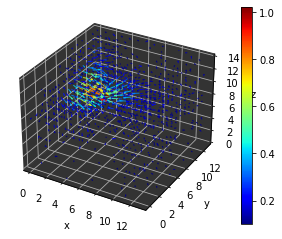

In [27]:
# filtered 3d deformation field
fig12 = quiver_3D(-uf, vf, wf, quiv_args={"length": 2, "alpha": 0.8, "linewidth": 1},
                  filter_def=0.1)

In [28]:
# saving the plots
if save_plots:
    fig11.savefig(os.path.join(out_put_folder, "real_data_unfiltered.png"))
    fig12.savefig(os.path.join(out_put_folder, "real_data_filtered.png"))

    # This needs a working ImageMagick installation, and probably works only on linux
    try:
        import imageio
        plt.ioff()
        f1 = plt.figure()
        plt.imshow(ims[0])
        plt.gca().add_artist(plt.Circle((330, 140), 100, color="red", fill=False))
        f1.savefig(os.path.join(out_put_folder,"tem1.png"))

        f2 = plt.figure()
        plt.imshow(ims[1])
        plt.gca().add_artist(plt.Circle((330, 140), 100, color="red", fill=False))
        f2.savefig(os.path.join(out_put_folder,"tem2.png"))

        i1 = plt.imread(os.path.join(out_put_folder,"tem1.png"))
        i2 = plt.imread(os.path.join(out_put_folder, "tem2.png"))
        imageio.mimsave(os.path.join(out_put_folder, "reaL_data_max_proj.gif"),[i1,i2], fps=1)
        os.remove(os.path.join(out_put_folder,"tem1.png"))
        os.remove(os.path.join(out_put_folder,"tem2.png"))
        plt.ion()
    except Exception as e:
        print ("failed to write gif of collagen embedded cell:")
        print(e)